In [168]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression
from termcolor import colored
from sklearn.model_selection import train_test_split
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
from tabulate import tabulate
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# Carga de datos.
df_banks_not_clean = pd.read_csv("./data/transacciones.csv")
df_banks_not_clean

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
print("Tipos de variables del dataset")
print(df_banks_not_clean.dtypes)
print("Registros y la cantidad de variables", df_banks_not_clean.shape)

Tipos de variables del dataset
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
Registros y la cantidad de variables (6362620, 11)


In [5]:
# Descripción básica del dataset
print("**Información estadística**")
df_banks_not_clean.describe()

**Información estadística**


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Eliminar las variables nameOrig y nameDest
df_banks_aux = df_banks_not_clean.drop(columns=['nameOrig', 'nameDest'])

In [7]:
df_banks_aux

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


## Acondicinoaamineto de los datos

In [8]:
total = df_banks_aux[(df_banks_aux['isFraud'] == 1)]['type'].count()
print('Existen ', total, ' observaciones que son fraude')

Existen  8213  observaciones que son fraude


In [9]:
both = df_banks_aux[(df_banks_aux['newbalanceDest'] == 0) | (df_banks_aux['oldbalanceDest'] == 0)].count()['oldbalanceDest']
print('Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación es fraude: ', both)

Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación es fraude:  2826539


In [10]:
porcentaje = (both/total) *100
# Mostrar el resultado formateado
print(f'Porcentaje de observaciones con 0 en las variables cuando hay fraude: {int(porcentaje)}%')


Porcentaje de observaciones con 0 en las variables cuando hay fraude: 34415%


In [11]:
total2 = df_banks_aux[(df_banks_aux['isFraud'] == 0)]['type'].count()
print('Existen ', total2, ' observaciones que NO son fraude')

Existen  6354407  observaciones que NO son fraude


In [12]:
both2 = df_banks_aux[(df_banks_aux['newbalanceDest'] == 0) | (df_banks_aux['oldbalanceDest'] == 0)].count()['oldbalanceDest']
print('Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación NO es fraude: ', both2)

Veces que aparecen ambas variables, newbalanceDest = oldbalanceDest = 0, cuando la observación NO es fraude:  2826539


In [13]:
porcentaje2 = (both2/total2) * 100 
print('Porcentaje de observaciones con 0 en las variables cuando NO hay fraude: ', porcentaje2,"%")

Porcentaje de observaciones con 0 en las variables cuando NO hay fraude:  44.4815542976709 %


In [14]:
orig_both = df_banks_aux[(df_banks_aux['newbalanceOrig'] == df_banks_aux['oldbalanceOrg'])].count()['oldbalanceOrg']
print('Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación es fraude: ', orig_both)

Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación es fraude:  2089037


In [15]:
porcentaje3 = (orig_both/total) * 100 
print('Porcentaje de observaciones con el mismo valor en las variables: ', porcentaje3)

Porcentaje de observaciones con el mismo valor en las variables:  25435.7360282479


In [16]:
orig_both2 = df_banks_aux[(df_banks_aux['newbalanceOrig'] == df_banks_aux['oldbalanceOrg'])].count()['oldbalanceOrg']
print('Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación NO es fraude: ', orig_both2)

Veces que aparecen ambas variables, newbalanceOrig = oldbalanceOrg, cuando la observación NO es fraude:  2089037


In [17]:
porcentaje4 = (orig_both2/total2) * 100 
print('Porcentaje de observaciones con el mismo valor en las variables: ', porcentaje4)

Porcentaje de observaciones con el mismo valor en las variables:  32.87540442404775


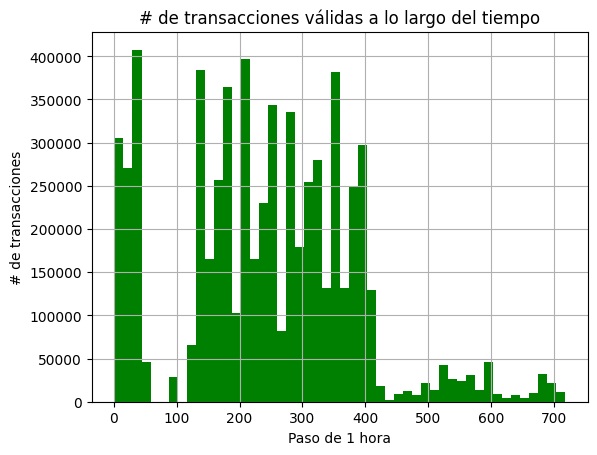

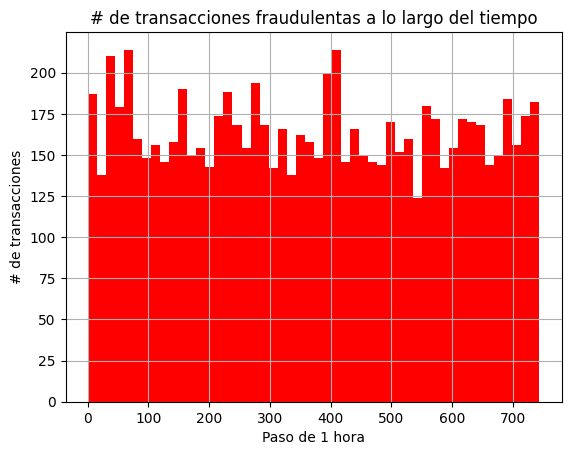

<Figure size 2000x1000 with 0 Axes>

In [18]:
bins = 50
# Histograma para transacciones válidas (isFraud == 0)
df_banks_aux[df_banks_aux['isFraud'] == 0].hist(column="step", color="green", bins=bins)
plt.xlabel("Paso de 1 hora")
plt.ylabel("# de transacciones")
plt.title("# de transacciones válidas a lo largo del tiempo")

# Histograma para transacciones fraudulentas (isFraud == 1)
df_banks_aux[df_banks_aux['isFraud'] == 1].hist(column="step", color="red", bins=bins)
plt.xlabel("Paso de 1 hora")
plt.ylabel("# de transacciones")
plt.title("# de transacciones fraudulentas a lo largo del tiempo")

# Ajuste del tamaño de la figura
plt.figure(figsize=(20, 10))

# Mostrar el gráfico
plt.show()


#### UnderSampling

In [19]:

columns = df_banks_aux.columns
print(columns)
X = df_banks_aux.drop('isFraud', axis=1)  
y = df_banks_aux['isFraud']  

# Contar las clases actuales
print("Antes del submuestreo:")
print(y.value_counts())

# Inicializar el RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo
X_under, y_under = undersample.fit_resample(X, y)

# Verificar las clases después del submuestreo
print("Después del submuestreo:")
print(pd.Series(y_under).value_counts())

print(X_under.shape)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
Antes del submuestreo:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
Después del submuestreo:
isFraud
0    8213
1    8213
Name: count, dtype: int64
(16426, 8)


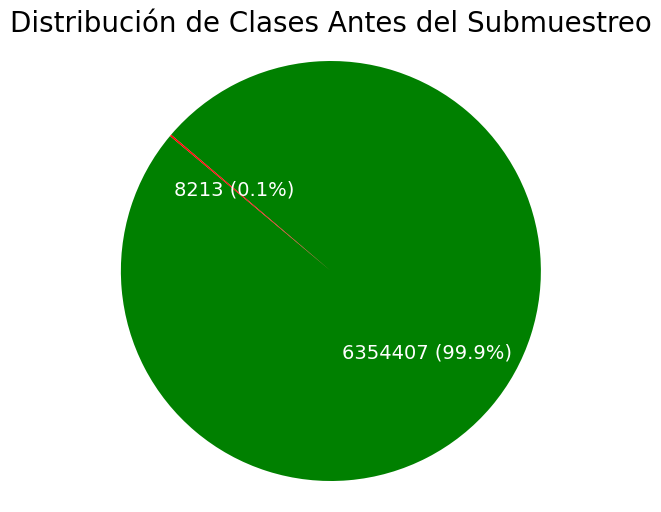

In [31]:

fig, ax = plt.subplots(figsize=(8, 6))

sizes = y.value_counts()
total_transacciones = sizes.sum() 

labels = [f'Clase 0' if i == 0 else 'Clase 1' for i in sizes.index]
colors = ['green', 'red']
def label_with_quantity_and_percentage(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute} ({pct:.1f}%)'

ax.pie(sizes, labels=labels, autopct=lambda pct: label_with_quantity_and_percentage(pct, sizes), colors=colors, startangle=140,  textprops={'color': 'white', 'fontsize': 14})
ax.axis('equal')  
ax.set_title('Distribución de Clases Antes del Submuestreo',fontsize=20)

plt.show()



C:\Users\gazumba\AppData\Local\Temp\ipykernel_6840\681674690.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['green', 'red'], ax=ax)


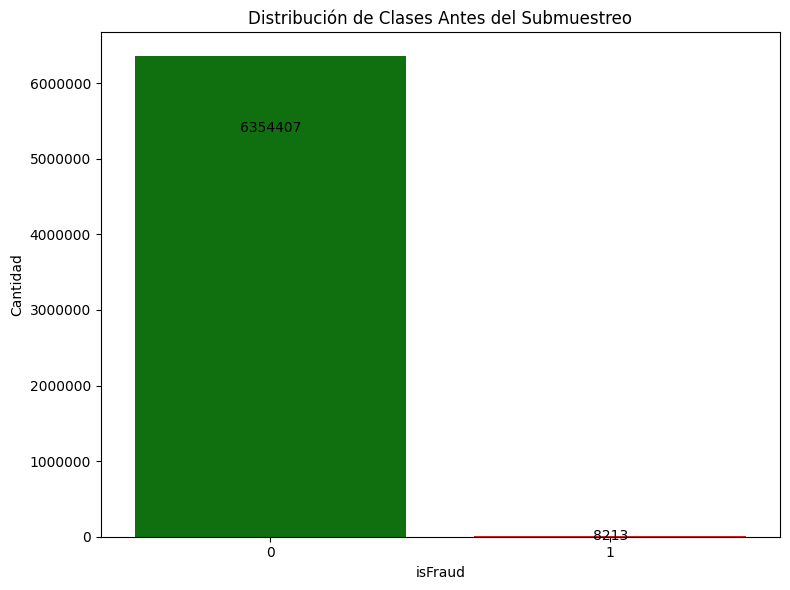

(6362620, 8)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que y es tu Serie de datos antes del submuestreo
# y = ...

# Crear la figura y el único subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Visualizar el balance de clases antes del submuestreo
sns.countplot(x=y, palette=['green', 'red'], ax=ax)
ax.set_title('Distribución de Clases Antes del Submuestreo')
ax.set_xlabel('isFraud')
ax.set_ylabel('Cantidad')

# Anotar el total de variables y porcentaje en cada barra antes del submuestreo
total_transacciones = y.value_counts().sum()
for i, count in enumerate(y.value_counts()):
    porcentaje = (count / total_transacciones) * 100
    # Ajustar la posición del texto para que esté más arriba dentro de la barra
    ax.text(i, count * 0.85, f'{count}', 
            ha='center', va='center', color='black', fontsize=10)

# Ajustar el formato del eje y para que use etiquetas de cantidad
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Ajustar el diseño para que no haya superposición
plt.tight_layout()
plt.show()

print(X.shape)  # O el nombre adecuado para X antes del submuestreo





C:\Users\gazumba\AppData\Local\Temp\ipykernel_4864\247152304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_under, palette=['green', 'red'], ax=ax)


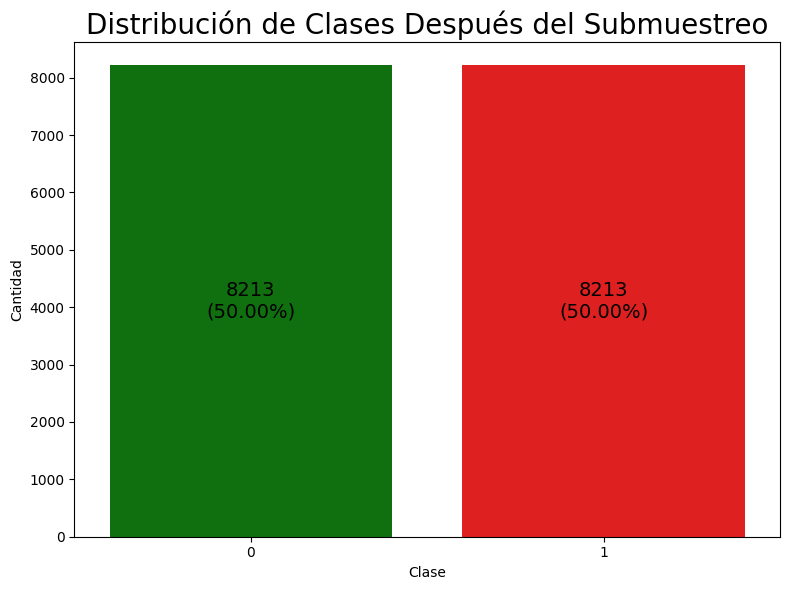

(16426, 8)


In [34]:

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x=y_under, palette=['green', 'red'], ax=ax)
ax.set_title('Distribución de Clases Después del Submuestreo',fontsize=20)
ax.set_xlabel('Clase') 
ax.set_ylabel('Cantidad')

total_transacciones_under = pd.Series(y_under).value_counts().sum()
for i, count in enumerate(pd.Series(y_under).value_counts()):
    porcentaje = (count / total_transacciones_under) * 100
    ax.text(i, count * 0.5, f'{count}\n({porcentaje:.2f}%)', 
            ha='center', va='center', color='black', fontsize=14)
plt.tight_layout()
plt.show()

print(X_under.shape) 




In [35]:
new_df_banks = pd.concat([X_under, y_under], axis=1)
new_df_banks

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
1777056,162,CASH_OUT,183806.32,19391.00,0.00,382572.19,566378.51,0,0
1350600,137,PAYMENT,521.37,0.00,0.00,0.00,0.00,0,0
1991933,179,PAYMENT,3478.18,19853.00,16374.82,0.00,0.00,0,0
5092368,355,PAYMENT,1716.05,5769.17,4053.13,0.00,0.00,0,0
5066515,354,CASH_IN,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,0,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,0,1


In [36]:
# Contar las instancias de cada clase en la columna 'isFraud' de new_df_banks
class_counts = new_df_banks['isFraud'].value_counts()

# Imprimir el conteo de cada clase
print("Conteo de cada clase en 'isFraud':")
print(class_counts)


Conteo de cada clase en 'isFraud':
isFraud
0    8213
1    8213
Name: count, dtype: int64


In [37]:
# Verificar si hay valores nulos en df_banks_ohe
null_counts = new_df_banks.isnull().sum()

# Imprimir el conteo de valores nulos por columna
print("Valores nulos por columna:")
print(null_counts)



Valores nulos por columna:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64


In [38]:
nan_counts = new_df_banks.isna().sum()
# Imprimir el conteo de valores NaN por columna
print("Valores NaN por columna:")
print(nan_counts)

Valores NaN por columna:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64


### OHE

In [39]:
df_type = new_df_banks[['type']]
ohe = OneHotEncoder(sparse_output=False)
df_type_ohe_array = ohe.fit_transform(df_type)
custom_column_names = ['cashIn', 'cashOut', 'debit', 'payment', 'transfer']
df_type_ohe = pd.DataFrame(df_type_ohe_array, columns=custom_column_names)
new_df_banks.reset_index(drop=True, inplace=True)
df_type_ohe.reset_index(drop=True, inplace=True)
new_df_banks_concat = pd.concat([new_df_banks, df_type_ohe], axis=1)
new_df_banks_concat.drop(columns=['type'], inplace=True)
new_df_banks_concat



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,cashIn,cashOut,debit,payment,transfer
0,162,183806.32,19391.00,0.00,382572.19,566378.51,0,0,0.0,1.0,0.0,0.0,0.0
1,137,521.37,0.00,0.00,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,179,3478.18,19853.00,16374.82,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
3,355,1716.05,5769.17,4053.13,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
4,354,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0.0,1.0,0.0,0.0,0.0
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,0,1,0.0,0.0,0.0,0.0,1.0
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0.0,1.0,0.0,0.0,0.0
16424,743,850002.52,850002.52,0.00,0.00,0.00,0,1,0.0,0.0,0.0,0.0,1.0


In [40]:
# Contar las instancias de cada clase en la columna 'isFraud' de new_df_banks
class_counts = new_df_banks_concat['isFraud'].value_counts()

# Imprimir el conteo de cada clase
print("Conteo de cada clase en 'isFraud':")
print(class_counts)


Conteo de cada clase en 'isFraud':
isFraud
0    8213
1    8213
Name: count, dtype: int64


##MATRIZ DE CORRELACION

In [41]:
cuantitativas = new_df_banks_concat.iloc[:,:6]
cuantitativas

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,162,183806.32,19391.00,0.00,382572.19,566378.51
1,137,521.37,0.00,0.00,0.00,0.00
2,179,3478.18,19853.00,16374.82,0.00,0.00
3,355,1716.05,5769.17,4053.13,0.00,0.00
4,354,253129.93,1328499.49,1581629.42,2713220.48,2460090.55
...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13
16422,743,6311409.28,6311409.28,0.00,0.00,0.00
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
16424,743,850002.52,850002.52,0.00,0.00,0.00


# Independencia entre dos atributo

In [42]:
corr_mat = cuantitativas.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.149111,0.074185,-0.022918,-0.006124,0.027531
amount,0.149111,1.000000,0.646056,0.123465,0.005105,0.256852
oldbalanceOrg,0.074185,0.646056,1.000000,0.824217,0.008734,0.117984
newbalanceOrig,-0.022918,0.123465,0.824217,1.000000,0.039598,0.005994
oldbalanceDest,-0.006124,0.005105,0.008734,0.039598,1.000000,0.928051
newbalanceDest,0.027531,0.256852,0.117984,0.005994,0.928051,1.000000


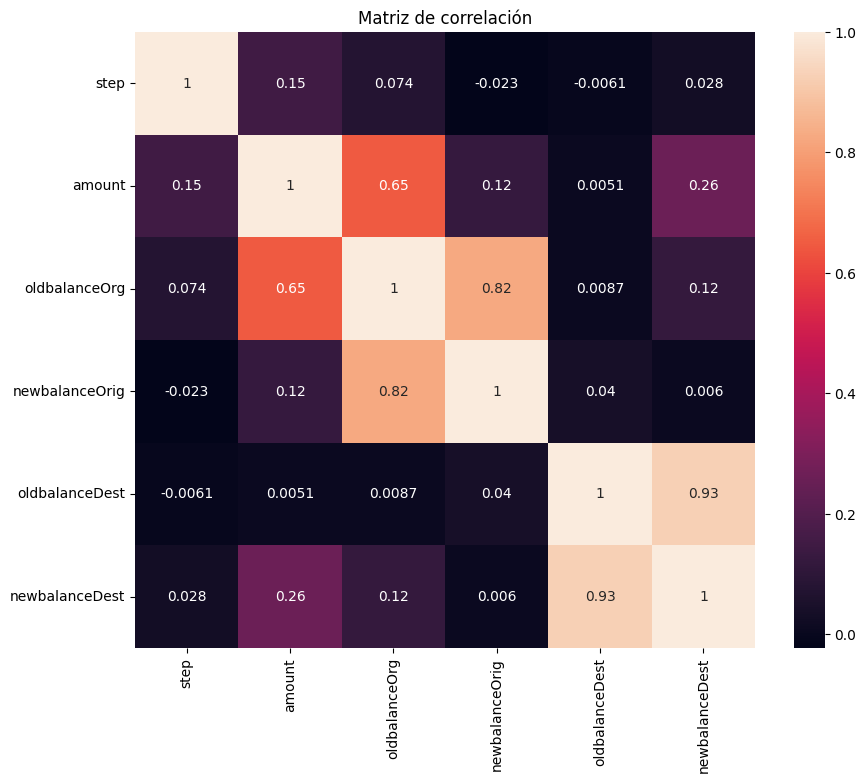

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title("Matriz de correlación")
plt.show()

### Normalizado y escalado

<Axes: ylabel='Density'>

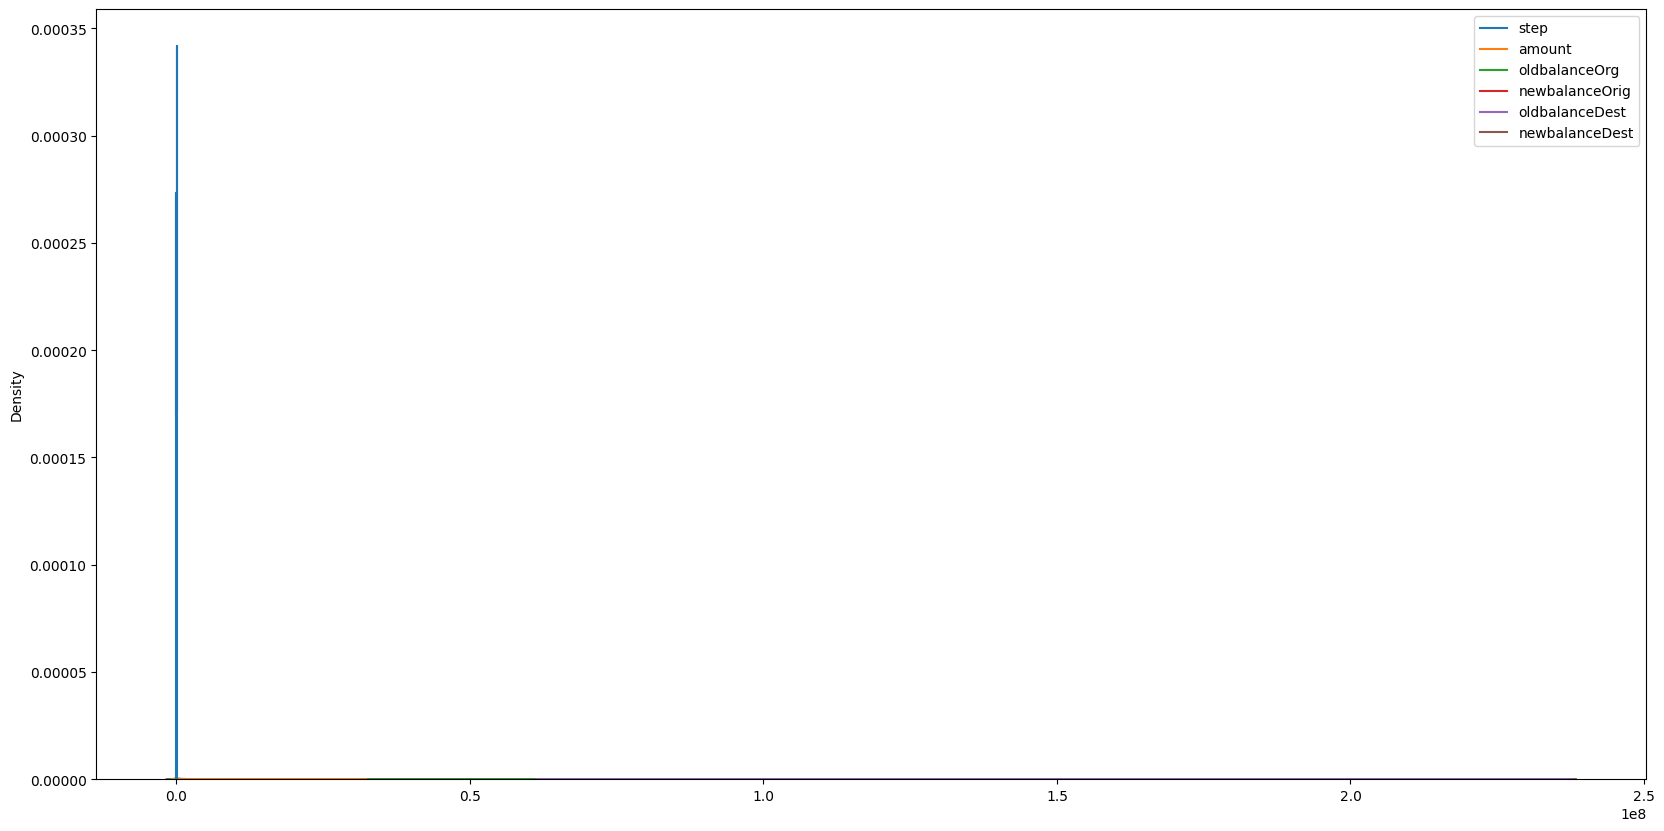

In [44]:
cuantitativas
plt.rcParams['figure.figsize']=[20,10]
sns.kdeplot(data=cuantitativas)

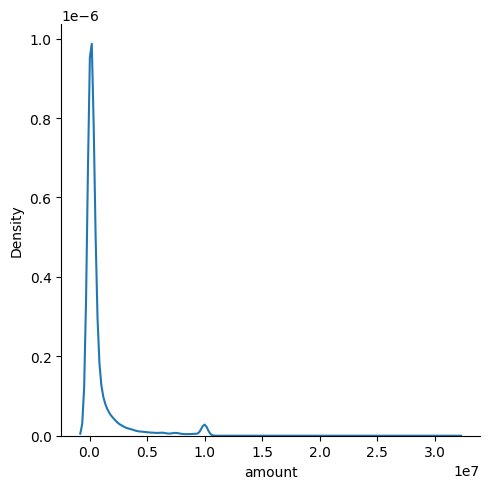

In [45]:
sns.displot(cuantitativas, x="amount", kind="kde")

In [46]:
print('Distribución del dataset en términos de mínimos y máximos por variable:')
mins = [cuantitativas[col].min() for col in cuantitativas.columns]
print('Minimos por variable: ', mins)
maxs = [cuantitativas[col].max() for col in cuantitativas.columns]
print('Maximos por variable: ', maxs)

Distribución del dataset en términos de mínimos y máximos por variable:
Minimos por variable:  [np.int64(1), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Maximos por variable:  [np.int64(743), np.float64(31479113.67), np.float64(59585040.37), np.float64(49585040.37), np.float64(236230516.82), np.float64(236726494.66)]


## Dependencia entre clases 

In [47]:
y = new_df_banks_concat['isFraud']
X = new_df_banks_concat.drop(columns=['isFraud'])
X.shape

(16426, 12)

In [48]:
def calcular_f_test_y_pvalues(X,y):
    f_test,p_value = f_regression(X, y) 

    alpha = 0.05 # valor de confianza es de 95%
    # Definimos la decisión de si aceptamos o rechazamos la hipótesis nula (Ho) para cada variable
    for i in range(len(p_value)):
        p_val = p_value[i]
        if p_val<alpha:
            h = 1 # Se rechaza la hipótesis nula que defiende la independencia entre variables. Por tanto, DEPENDIENTES.
            print(colored(f'La variable {X.columns[i]} es linealmente DEPENDIENTE de la clase. p-value: {p_val}', 'green'))
        else:
            h = 0 # No hay evidencia estadística para rechazar la hipótesis nula, por tanto, se asume INDEPENDENCIA entre variables
            print(colored(f'La variable {X.columns[i]} es linealmente INDEPENDIENTE de la clase. p-value: {p_val}', 'red'))
    

In [49]:
calcular_f_test_y_pvalues(X, y)

La variable step es linealmente DEPENDIENTE de la clase. p-value: 0.0
La variable amount es linealmente DEPENDIENTE de la clase. p-value: 0.0
La variable oldbalanceOrg es linealmente DEPENDIENTE de la clase. p-value: 2.915414008589636e-58
La variable newbalanceOrig es linealmente DEPENDIENTE de la clase. p-value: 8.429447406322401e-66
La variable oldbalanceDest es linealmente DEPENDIENTE de la clase. p-value: 4.002633270624571e-26
La variable newbalanceDest es linealmente INDEPENDIENTE de la clase. p-value: 0.5308150181058151
La variable isFlaggedFraud es linealmente DEPENDIENTE de la clase. p-value: 6.264462761011947e-05
La variable cashIn es linealmente DEPENDIENTE de la clase. p-value: 0.0
La variable cashOut es linealmente DEPENDIENTE de la clase. p-value: 3.626393278054298e-76
La variable debit es linealmente DEPENDIENTE de la clase. p-value: 1.3731816450040564e-12
La variable payment es linealmente DEPENDIENTE de la clase. p-value: 0.0
La variable transfer es linealmente DEPENDIE

In [165]:
def evaluar_informacion_mutua(X,y):
    mutual_info = mutual_info_regression(X, y) #(supvervisado)
    #print(mutual_info)
    # Definimos un umbral de aceptación
    th =  0.05
    # Definimos la decisión de si aceptamos o rechazamos la hipótesis nula (Ho) para cada variable
    for i in range(len(mutual_info)):
        mi = mutual_info[i]
        
        if mi>th:
            h = 1
            print(colored(f'La variable {X.columns[i]} como DEPENDIENTE de la clase, ya que el valor de MI={np.round(mi, 4)} es superior al umbral establecido', 'green'))
        else:
            h = 0 # No hay evidencia estadística para rechazar la hipótesis nula, por tanto, se asume INDEPENDENCIA entre variables
            print(colored(f'La variable {X.columns[i]} como INDEPENDIENTE de la clase, ya que el valor de MI={np.round(mi, 4)} es inferior al umbral establecido', 'red'))



In [166]:

evaluar_informacion_mutua(X,y)


La variable step como DEPENDIENTE de la clase, ya que el valor de MI=0.2872 es superior al umbral establecido
La variable amount como DEPENDIENTE de la clase, ya que el valor de MI=0.2677 es superior al umbral establecido
La variable oldbalanceOrg como DEPENDIENTE de la clase, ya que el valor de MI=0.3046 es superior al umbral establecido
La variable newbalanceOrig como DEPENDIENTE de la clase, ya que el valor de MI=0.1566 es superior al umbral establecido
La variable oldbalanceDest como INDEPENDIENTE de la clase, ya que el valor de MI=0.0422 es inferior al umbral establecido
La variable newbalanceDest como INDEPENDIENTE de la clase, ya que el valor de MI=0.0136 es inferior al umbral establecido
La variable isFlaggedFraud como INDEPENDIENTE de la clase, ya que el valor de MI=0.0011 es inferior al umbral establecido
La variable cashIn como DEPENDIENTE de la clase, ya que el valor de MI=0.077 es superior al umbral establecido
La variable cashOut como INDEPENDIENTE de la clase, ya que el 

In [52]:
f_test, p_value = f_regression(X, y) 
mutual_info = mutual_info_regression(X, y) #(supvervisado)

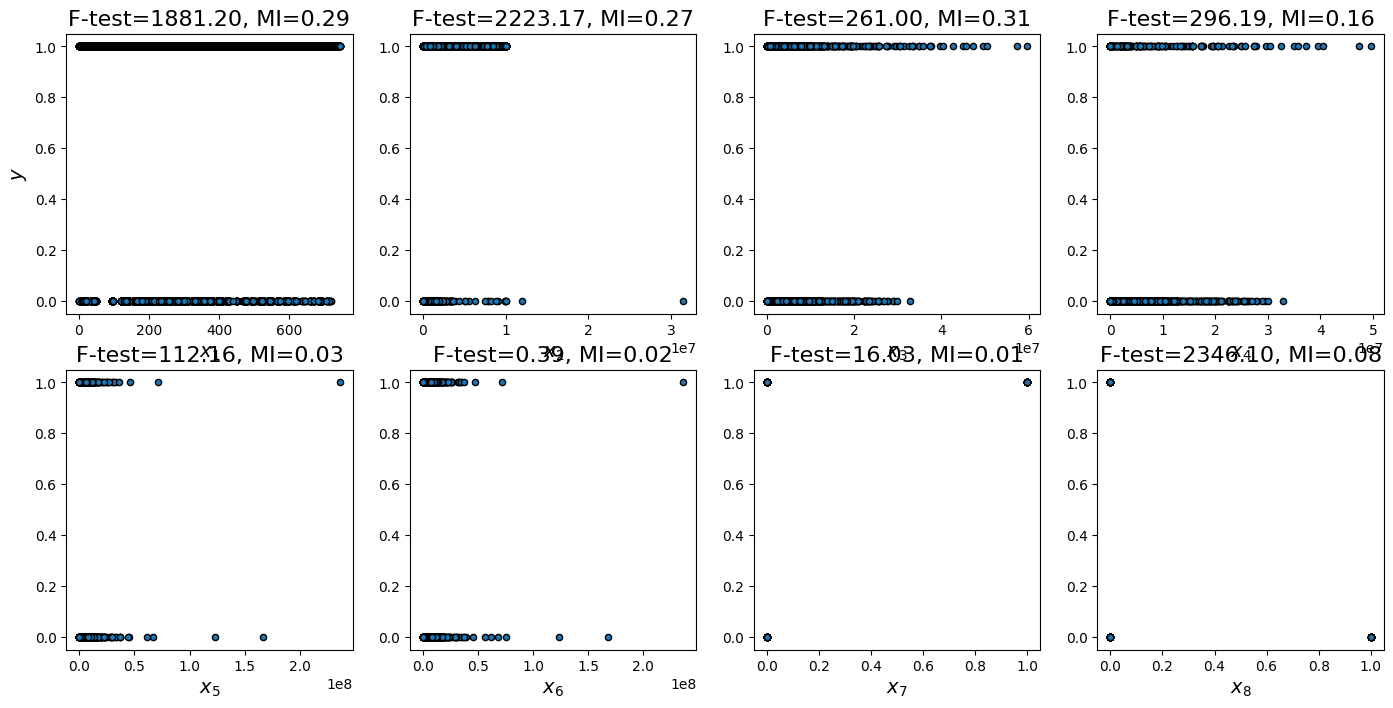

In [53]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(17, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.scatter(X.iloc[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mutual_info[i]), fontsize=16)
plt.show()

#### particion de datos

In [54]:
# Test: hold-out split 80-20%. # Partición externa
X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)
valores_train, ocur_train = np.unique(y_training, return_counts=True)
print('Train: ', 'clases:', valores_train, ' ocurrencias: ', ocur_train)
X.shape

Test:  clases: [0 1]  ocurrencias:  [1649 1637]
Train:  clases: [0 1]  ocurrencias:  [6564 6576]


(16426, 12)

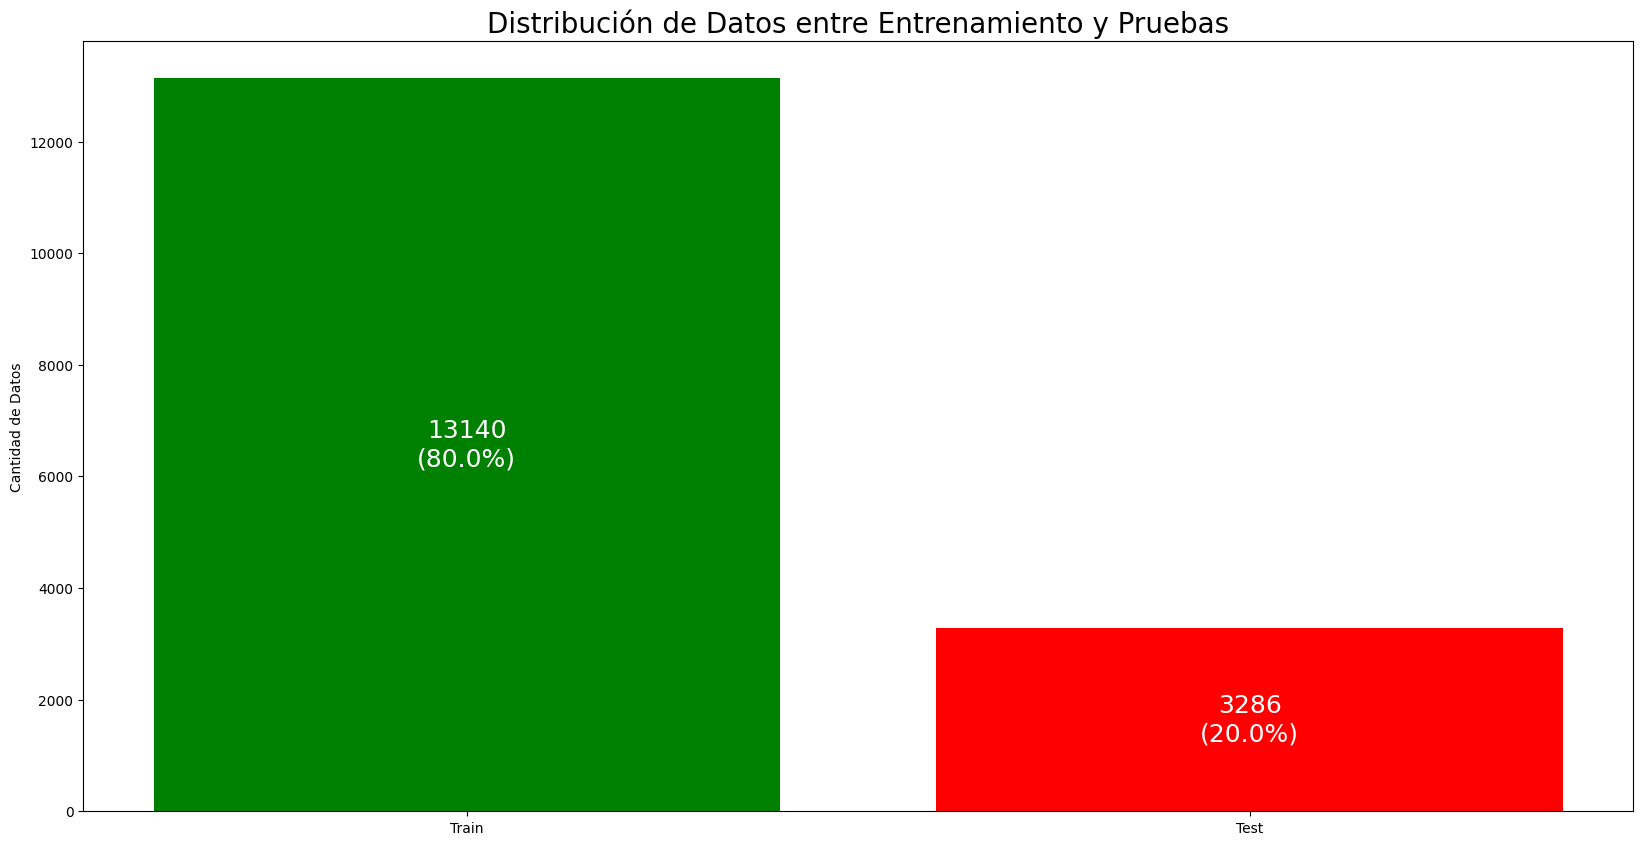

In [60]:

_, ocur_train = np.unique(y_training, return_counts=True)
_, ocur_test = np.unique(y_test, return_counts=True)

total_train = sum(ocur_train)
total_test = sum(ocur_test)

total = total_train + total_test
etiquetas = ['Train', 'Test']
valores = [total_train, total_test]

plt.bar(etiquetas, valores, color=['green', 'red'])

plt.title('Distribución de Datos entre Entrenamiento y Pruebas', fontsize=20)
plt.ylabel('Cantidad de Datos')

for i, valor in enumerate(valores):
    porcentaje = (valor / total) * 100
    plt.text(i, valor / 2, f'{valor}\n({porcentaje:.1f}%)', ha='center', va='center', fontsize=18, color='white')

plt.show()



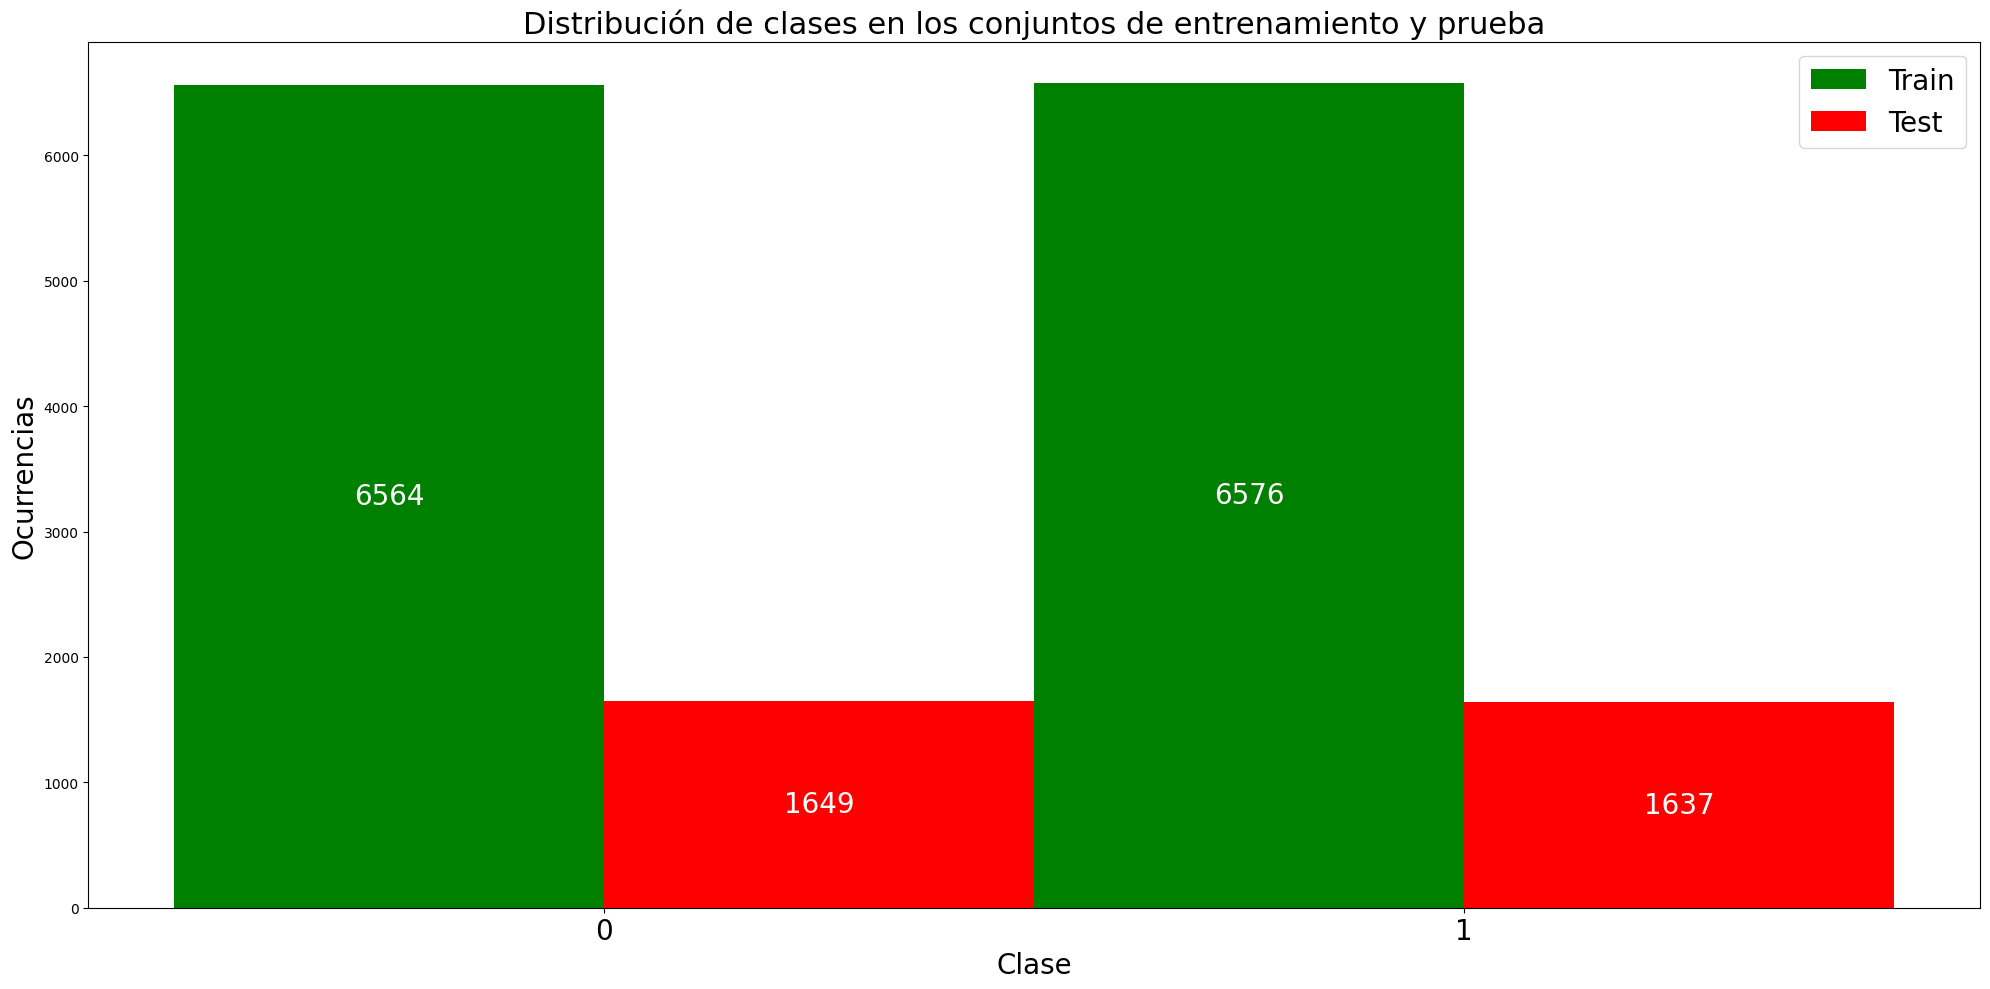

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que ambas clases 0 y 1 estén presentes en ambos conjuntos
classes = [0, 1]
ocur_train_dict = dict(zip(valores_train, ocur_train))
ocur_test_dict = dict(zip(valores_test, ocur_test))

# Rellenar con ceros si una clase está ausente en un conjunto
ocur_train = [ocur_train_dict.get(cls, 0) for cls in classes]
ocur_test = [ocur_test_dict.get(cls, 0) for cls in classes]

labels = classes 
x = np.arange(len(labels))  

width = 0.5  

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, ocur_train, width, label='Train', color='green')
rects2 = ax.bar(x + width/2, ocur_test, width, label='Test', color='red')

ax.set_ylabel('Ocurrencias', fontsize=20)
ax.set_xlabel('Clase', fontsize=20)
ax.set_title('Distribución de clases en los conjuntos de entrenamiento y prueba', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.legend(fontsize=20)

# Función para añadir etiquetas dentro de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height / 2),  # Centrar el texto en la barra
                    xytext=(0, 0),  # Ajustar para colocar el texto justo en el centro
                    textcoords="offset points",
                    ha='center', va='center',
                    fontsize=20, color='white')  # Cambiar color del texto a blanco para contraste

# Añadir etiquetas a ambas barras
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [38]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
7332,39,239086.46,404.00,0.00,1163545.09,1402631.54,0,0.0,1.0,0.0,0.0,0.0
3016,256,8167.66,111022.00,102854.34,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
14627,579,1540624.70,1540624.70,0.00,78012.35,1618637.05,0,0.0,1.0,0.0,0.0,0.0
4747,34,181039.86,3056.00,184095.86,0.00,0.00,0,1.0,0.0,0.0,0.0,0.0
2543,40,695436.90,11448.68,0.00,1139300.35,1834737.25,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,273,159106.12,159106.12,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
11964,336,170038.31,170038.31,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
5390,18,8369.07,23265.00,14895.93,70063.42,78432.50,0,0.0,1.0,0.0,0.0,0.0
860,249,262120.50,8127067.18,8389187.68,407941.21,145820.71,0,1.0,0.0,0.0,0.0,0.0


In [39]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
13724,496,766151.45,766151.45,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
12284,365,31315.51,31315.51,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
1163,302,19043.02,70067.00,51023.98,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
6057,383,11162.03,102921.00,91758.97,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
6492,354,268851.80,220431.00,0.00,1641753.59,1910605.40,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14576,576,884821.37,884821.37,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
10792,230,102009.37,102009.37,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
10187,174,250223.24,250223.24,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
11175,262,639680.32,639680.32,0.00,221209.81,860890.13,0,0.0,1.0,0.0,0.0,0.0


# Normalizacion y escalado

In [66]:
# Estandarización de los datos de entrenamiento y test Se utiliza la función StandarScaler(), para implementar la normalización z-score
standardizer = preprocessing.StandardScaler()
X_train_est = standardizer.fit_transform(X_train.iloc[:,:6])
X_test_est = standardizer.transform(X_test.iloc[:,:6])

In [67]:
print('Después de estandarizar')
print(f'Mínimo valor en X_train_est: {X_train_est.min()}')
print(f'Máximo valor en X_train_est: {X_test_est.max()}')
print(f'Mínimo valor en X_test_est: {X_train_est.min()}')
print(f'Máximo valor en X_test_est: {X_test_est.max()}')

Después de estandarizar
Mínimo valor en X_train_est: -1.582886982697591
Máximo valor en X_train_est: 18.83120091660777
Mínimo valor en X_test_est: -1.582886982697591
Máximo valor en X_test_est: 18.83120091660777


In [68]:
normalizer = preprocessing.MinMaxScaler()
X_training_norm = normalizer.fit_transform(X_train_est)
X_testing_norm = normalizer.transform(X_test_est)


In [69]:
print('Distribución del dataset en términos de mínimos y máximos por variable despues de normalizar:')
print(f'Mínimo valor en X_training_norm: {X_training_norm.min()}')
print(f'Máximo valor en X_training_norm: {X_training_norm.max()}')
print(f'Mínimo valor en X_testing_norm: {X_testing_norm.min()}')
print(f'Máximo valor en X_testing_norm: {X_testing_norm.max()}')


Distribución del dataset en términos de mínimos y máximos por variable despues de normalizar:
Mínimo valor en X_training_norm: 0.0
Máximo valor en X_training_norm: 1.0
Mínimo valor en X_testing_norm: 0.0
Máximo valor en X_testing_norm: 2.6237060381998094


In [70]:
X_training_norm

array([[5.12129380e-02, 1.99272634e-02, 6.78022533e-06, 0.00000000e+00,
        4.92546478e-03, 5.92511431e-03],
       [3.43665768e-01, 6.80754201e-04, 1.86325291e-03, 2.07430183e-03,
        0.00000000e+00, 0.00000000e+00],
       [7.78975741e-01, 1.28407247e-01, 2.58558976e-02, 0.00000000e+00,
        3.30238240e-04, 6.83758298e-03],
       ...,
       [2.29110512e-02, 6.97541224e-04, 3.90450352e-04, 3.00411775e-04,
        2.96589200e-04, 3.31321173e-04],
       [3.34231806e-01, 2.18470935e-02, 1.36394423e-01, 1.69187876e-01,
        1.72687769e-03, 6.15988127e-04],
       [9.27223720e-01, 1.90379545e-02, 3.83345498e-03, 0.00000000e+00,
        1.80657565e-04, 1.14517558e-03]])

In [71]:
X_testing_norm

array([[6.67115903e-01, 6.38568229e-02, 1.28581175e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.90566038e-01, 2.61007008e-03, 5.25559936e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.05660377e-01, 1.58718848e-03, 1.17591596e-03, 1.02901963e-03,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [2.33153639e-01, 2.08554864e-02, 4.19943057e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.51752022e-01, 5.33157679e-02, 1.07355859e-02, 0.00000000e+00,
        9.36415045e-04, 3.63664461e-03],
       [1.84636119e-01, 1.45305232e-03, 8.47158946e-04, 1.36959977e-03,
        3.84186545e-03, 3.76017138e-03]])

In [72]:
col_names = cuantitativas.iloc[:,:6].columns
col_names

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [73]:
df_train_norm = pd.DataFrame(X_training_norm, columns=col_names)
df_test_norm = pd.DataFrame(X_testing_norm, columns=col_names)
df_combined_norm = pd.concat([df_train_norm, df_test_norm], ignore_index=True)
print("Datos para el test       : ",df_test_norm.shape)
print("Datos para entrenamiento : ",df_train_norm.shape)

Datos para el test       :  (3286, 6)
Datos para entrenamiento :  (13140, 6)


In [74]:
df_combined_norm

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.051213,0.019927,0.000007,0.000000,0.004925,0.005925
1,0.343666,0.000681,0.001863,0.002074,0.000000,0.000000
2,0.778976,0.128407,0.025856,0.000000,0.000330,0.006838
3,0.044474,0.015089,0.000051,0.003713,0.000000,0.000000
4,0.052561,0.057963,0.000192,0.000000,0.004823,0.007750
...,...,...,...,...,...,...
16421,0.774933,0.073748,0.014850,0.000000,0.000000,0.000000
16422,0.308625,0.008502,0.001712,0.000000,0.000000,0.000000
16423,0.233154,0.020855,0.004199,0.000000,0.000000,0.000000
16424,0.351752,0.053316,0.010736,0.000000,0.000936,0.003637


In [76]:
print('Distribución del dataset en términos de mínimos y máximos por variable despues de normalizar:')
mins = [float(df_combined_norm[col].min()) for col in df_combined_norm.columns]
print('Minimos por variable: ', mins)
maxs = [float(df_combined_norm[col].max()) for col in df_combined_norm.columns]
print('Maximos por variable: ', maxs)


Distribución del dataset en términos de mínimos y máximos por variable despues de normalizar:
Minimos por variable:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Maximos por variable:  [1.0, 2.6237060381998094, 1.0, 1.0, 1.0, 1.0]


In [77]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
7332,39,239086.46,404.00,0.00,1163545.09,1402631.54,0,0.0,1.0,0.0,0.0,0.0
3016,256,8167.66,111022.00,102854.34,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
14627,579,1540624.70,1540624.70,0.00,78012.35,1618637.05,0,0.0,1.0,0.0,0.0,0.0
4747,34,181039.86,3056.00,184095.86,0.00,0.00,0,1.0,0.0,0.0,0.0,0.0
2543,40,695436.90,11448.68,0.00,1139300.35,1834737.25,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,273,159106.12,159106.12,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
11964,336,170038.31,170038.31,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
5390,18,8369.07,23265.00,14895.93,70063.42,78432.50,0,0.0,1.0,0.0,0.0,0.0
860,249,262120.50,8127067.18,8389187.68,407941.21,145820.71,0,1.0,0.0,0.0,0.0,0.0


In [78]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
13724,496,766151.45,766151.45,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
12284,365,31315.51,31315.51,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
1163,302,19043.02,70067.00,51023.98,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
6057,383,11162.03,102921.00,91758.97,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
6492,354,268851.80,220431.00,0.00,1641753.59,1910605.40,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14576,576,884821.37,884821.37,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
10792,230,102009.37,102009.37,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
10187,174,250223.24,250223.24,0.00,0.00,0.00,0,0.0,0.0,0.0,0.0,1.0
11175,262,639680.32,639680.32,0.00,221209.81,860890.13,0,0.0,1.0,0.0,0.0,0.0


In [79]:
print(df_test_norm.shape)
print(X_train.shape)
X_training = pd.concat([df_train_norm, X_train.iloc[:,6:]])
X_testing = pd.concat([df_test_norm,X_test.iloc[:,6:]])
print("TRAT--",X_training.shape)
print("TEST--",X_testing.shape)


(3286, 6)
(13140, 12)
TRAT-- (26280, 12)
TEST-- (6572, 12)


In [80]:
assert df_train_norm.shape[0] == X_train.shape[0], "Las filas de df_train_norm y X_train no coinciden"
assert df_test_norm.shape[0] == X_test.shape[0], "Las filas de df_test_norm y X_test no coinciden"

# Restablecer los índices antes de concatenar
df_train_norm.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
df_test_norm.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_training = pd.concat([df_train_norm, X_train.iloc[:, 6:]], axis=1)
X_testing = pd.concat([df_test_norm, X_test.iloc[:, 6:]], axis=1)

print("Shape of X_training:", X_training.shape)  
print("Shape of X_testing:", X_testing.shape)   




Shape of X_training: (13140, 12)
Shape of X_testing: (3286, 12)


In [81]:
X_training

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
0,0.051213,0.019927,0.000007,0.000000,0.004925,0.005925,0,0.0,1.0,0.0,0.0,0.0
1,0.343666,0.000681,0.001863,0.002074,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
2,0.778976,0.128407,0.025856,0.000000,0.000330,0.006838,0,0.0,1.0,0.0,0.0,0.0
3,0.044474,0.015089,0.000051,0.003713,0.000000,0.000000,0,1.0,0.0,0.0,0.0,0.0
4,0.052561,0.057963,0.000192,0.000000,0.004823,0.007750,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13135,0.366577,0.013261,0.002670,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
13136,0.451482,0.014172,0.002854,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
13137,0.022911,0.000698,0.000390,0.000300,0.000297,0.000331,0,0.0,1.0,0.0,0.0,0.0
13138,0.334232,0.021847,0.136394,0.169188,0.001727,0.000616,0,1.0,0.0,0.0,0.0,0.0


In [82]:
X_testing

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,cashIn,cashOut,debit,payment,transfer
0,0.667116,0.063857,0.012858,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
1,0.490566,0.002610,0.000526,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
2,0.405660,0.001587,0.001176,0.001029,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
3,0.514825,0.000930,0.001727,0.001851,0.000000,0.000000,0,0.0,0.0,0.0,1.0,0.0
4,0.475741,0.022408,0.003699,0.000000,0.006950,0.008071,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3281,0.774933,0.073748,0.014850,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
3282,0.308625,0.008502,0.001712,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
3283,0.233154,0.020855,0.004199,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0
3284,0.351752,0.053316,0.010736,0.000000,0.000936,0.003637,0,0.0,1.0,0.0,0.0,0.0


### entreanmiento

## Funciones

In [83]:

def print_classification_report(y_true, y_pred, target_names=None, plot_heatmap=False):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    df = pd.DataFrame(report).transpose()
    table = tabulate(df, headers='keys', tablefmt='github', numalign='center', stralign='center')
    print(table)
    if plot_heatmap:
        plt.figure(figsize=(6, 4))
        sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='BuGn', fmt=".2f", cbar=True,
                    linewidths=0.5, linecolor='black')
        plt.title('Classification Report Heatmap')
        plt.show()

In [204]:
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,4))  
    plt.plot(fpr, tpr, color='green', lw=4, label=f'Curva ROC (área = {roc_auc:.2f})')  
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()


In [112]:

def plot_confusion_matrix2(y_true, y_pred):
    labels=['No Fraude', 'Fraude']
    title='Matriz de Confusión'
    cmap='Blues'

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title(title)

    plt.show()


In [131]:

def plot_confusion_matrix(y_true, y_pred):
    labels = ['No Fraude', 'Fraude']
    title = 'Matriz de Confusión'
    cmap = 'Blues'
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)'
    plt.figure(figsize=(6, 4)) # "color": "#00FF00"}
    sns.heatmap(cm, annot=annot, cmap=cmap, fmt='', xticklabels=labels, yticklabels=labels,annot_kws={"fontsize": 12})

    # Etiquetas y título
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title(title)

    plt.show()


In [86]:
def calcular_sensibilidad(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    try:
        sensibilidad = TP / (TP + FN)
    except ZeroDivisionError:
        sensibilidad = 0.0
    
    return sensibilidad


In [176]:
# Calcular F1-Score
def calcular_f1_score(y_test, y_pred_gb):
    f1 = f1_score(y_test, y_pred_gb, average='weighted')
    print(f'F1 Score: {f1:.2f}')

In [178]:
def calcular_accuracy(y_test, y_pred_gb):
    accuracy = accuracy_score(y_test, y_pred_gb)
    print(f'Accuracy en el conjunto de prueba: {accuracy:.2f}')

In [184]:
def calcular_probabilidad_accuracy(X_testing, gb):
    y_scores_gb = gb.predict_proba(X_testing)[:, 1]
    print("Probabilidades predichas:", y_scores_gb)

In [62]:
def load_model(filename):
    filepath = os.path.join('models', filename)
    with open(filepath, 'rb') as fr:
        model = pickle.load(fr)
    print(f'Modelo cargado desde {filepath}')
    return model

In [87]:
def save_model(model, filename):
    os.makedirs('models', exist_ok=True)
    filepath = os.path.join('models', filename)
    with open(filepath, 'wb') as fw:
        pickle.dump(model, fw)
    print(f'Modelo guardado en {filepath}')


## Regresion lógistica

In [88]:
LR = LogisticRegression(max_iter=1000)  

In [89]:
#Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR, X_training, y_training, cv=kf)
print("Resultados por bolsa: ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Resultados por bolsa:  [0.84474886 0.83447489 0.82343988 0.82762557 0.83599696]
Accuracy (media +/- desv.): 0.8333 +/- 0.0073


In [90]:
lr=LR.fit(X_training, y_training)

In [91]:
# Predice la clase de test
y_pred_lr = lr.predict(X_testing)


In [194]:
y_scores_lr = lr.predict_proba(X_testing)[:, 1]
print("Probabilidades predichas:", y_scores_lr)

Probabilidades predichas: [9.28429766e-01 8.31429394e-01 1.57719161e-03 ... 7.57213523e-01
 5.74374119e-01 6.86824451e-04]


In [93]:
sensibilidad = calcular_sensibilidad(y_test, y_pred_lr)
print(f"La sensibilidad del modelo es: {sensibilidad:.2f}")

La sensibilidad del modelo es: 0.87


In [192]:
# calcular accuracy
calcular_accuracy(y_test, y_pred_lr)


Accuracy en el conjunto de prueba: 0.82


In [215]:
# F1 -Score
calcular_f1_score(y_test, y_pred_lr)

F1 Score: 0.82


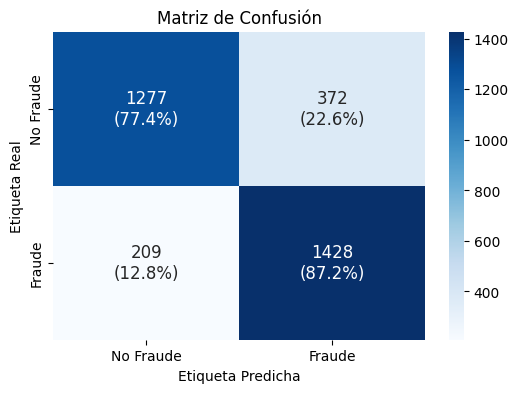

In [200]:
plot_confusion_matrix(y_test, y_pred_lr)

In [201]:
print_classification_report(y_test, y_pred_lr) 

|              |  precision  |  recall  |  f1-score  |  support  |
|--------------|-------------|----------|------------|-----------|
|      0       |  0.859354   | 0.774409 |  0.814673  |   1649    |
|      1       |  0.793333   | 0.872327 |  0.830957  |   1637    |
|   accuracy   |  0.823189   | 0.823189 |  0.823189  | 0.823189  |
|  macro avg   |  0.826344   | 0.823368 |  0.822815  |   3286    |
| weighted avg |  0.826464   | 0.823189 |  0.822785  |   3286    |


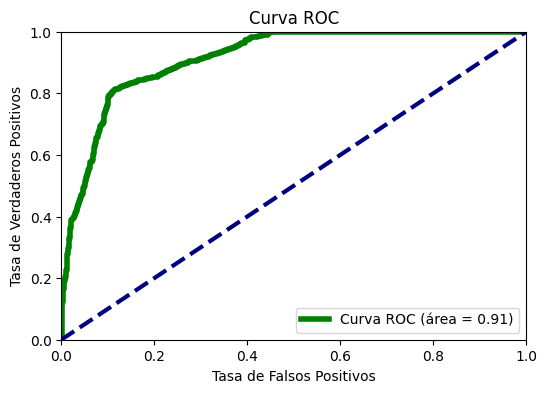

In [205]:
plot_roc_curve(y_test, y_scores_lr)

## arboles de desición

In [100]:
TR = DecisionTreeClassifier(random_state=42)

In [135]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(TR, X_training, y_training, cv=kf)

print("Resultados por bolsa (validación interna): ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Resultados por bolsa (validación interna):  [0.99048706 0.98592085 0.99238965 0.98668189 0.99277017]
Accuracy (media +/- desv.): 0.9896 +/- 0.0029


In [136]:
tr=TR.fit(X_training, y_training)

In [137]:
# predice la clase de test
y_pred_tr = tr.predict(X_testing)
y_pred_tr

array([1, 1, 0, ..., 1, 1, 0])

In [208]:
y_scores_tr = tr.predict_proba(X_testing)[:, 1] 
print("Probabilidades predichas:", y_scores_tr)

Probabilidades predichas: [1. 1. 0. ... 1. 1. 0.]


In [105]:
sensibilidad = calcular_sensibilidad(y_test, y_pred_tr)
print(f"La sensibilidad del modelo es: {sensibilidad:.2f}")

La sensibilidad del modelo es: 0.99


In [206]:
# calcular accuracy
calcular_accuracy(y_test, y_pred_tr)

Accuracy en el conjunto de prueba: 0.99


In [207]:
# F1 -Score
calcular_f1_score(y_test, y_pred_tr)

F1 Score: 0.99


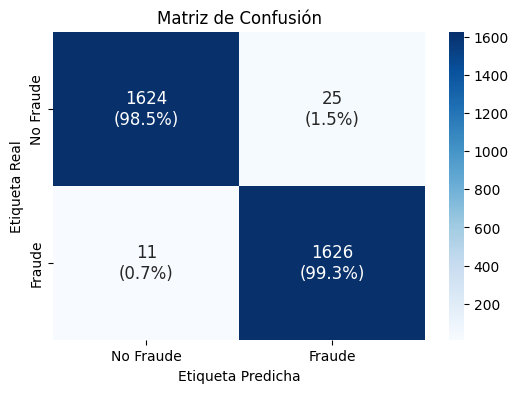

In [141]:
plot_confusion_matrix(y_test, y_pred_tr)

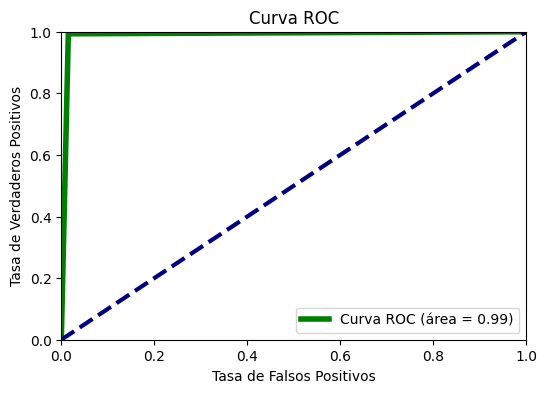

In [209]:
plot_roc_curve(y_test,y_scores_tr)

In [210]:
print_classification_report(y_test, y_pred_tr)

|              |  precision  |  recall  |  f1-score  |  support  |
|--------------|-------------|----------|------------|-----------|
|      0       |  0.993272   | 0.984839 |  0.989038  |   1649    |
|      1       |  0.984858   | 0.99328  |  0.989051  |   1637    |
|   accuracy   |  0.989044   | 0.989044 |  0.989044  | 0.989044  |
|  macro avg   |  0.989065   | 0.98906  |  0.989044  |   3286    |
| weighted avg |   0.98908   | 0.989044 |  0.989044  |   3286    |


In [143]:
name= "decision_tree_model.pickle"

In [117]:
save_model(tr,name)

Modelo guardado en models\decision_tree_model.pickle


# MLP

In [119]:
MLP = MLPClassifier(hidden_layer_sizes=(300,), max_iter=300, random_state=42)

In [120]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(MLP, X_training, y_training, cv=kf)

print("Resultados por bolsa (validación interna): ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados por bolsa (validación interna):  [0.97336377 0.97108067 0.97336377 0.96879756 0.97716895]
Accuracy (media +/- desv.): 0.9728 +/- 0.0028


d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [144]:
mlp=MLP.fit(X_training, y_training)

d:\ENTORNOS_PYTHON\tfm\tfm-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [146]:
y_pred_mpl = mlp.predict(X_testing)
y_pred_mpl

array([1, 1, 0, ..., 1, 1, 0])

In [147]:
sensibilidad = calcular_sensibilidad(y_test, y_pred_mpl)
print(f"La sensibilidad del modelo es: {sensibilidad:.2f}")

La sensibilidad del modelo es: 0.99


In [211]:
y_scores_mpl = mlp.predict_proba(X_testing)[:, 1] # clase positiva
print("Probabilidades predichas:", y_scores_mpl)

Probabilidades predichas: [9.99979353e-01 9.77682096e-01 4.08835067e-09 ... 9.93906917e-01
 9.99253521e-01 1.52848029e-08]


In [216]:
# calcular accuracy
calcular_accuracy(y_test, y_pred_mpl)

Accuracy en el conjunto de prueba: 0.98


In [217]:
# F1 -Score
calcular_f1_score(y_test, y_pred_tr)

F1 Score: 0.99


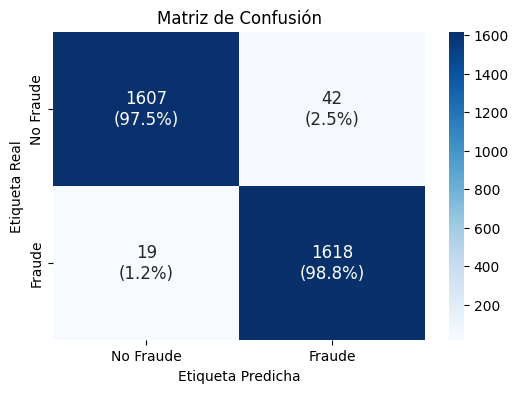

In [214]:
plot_confusion_matrix(y_test, y_pred_mpl)

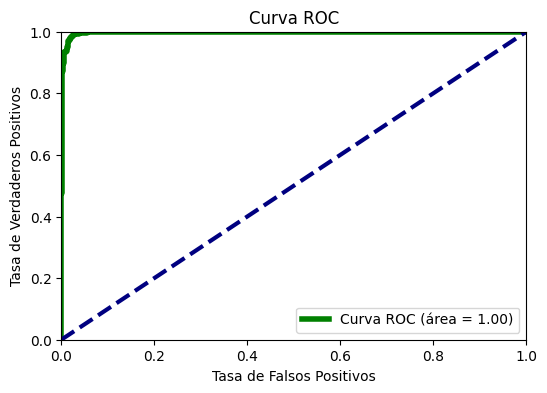

In [213]:
plot_roc_curve(y_test,y_scores_mpl)

In [151]:
print_classification_report(y_test, y_pred_mpl)

|              |  precision  |  recall  |  f1-score  |  support  |
|--------------|-------------|----------|------------|-----------|
|      0       |  0.988315   | 0.97453  |  0.981374  |   1649    |
|      1       |  0.974699   | 0.988393 |  0.981498  |   1637    |
|   accuracy   |  0.981436   | 0.981436 |  0.981436  | 0.981436  |
|  macro avg   |  0.981507   | 0.981462 |  0.981436  |   3286    |
| weighted avg |  0.981532   | 0.981436 |  0.981436  |   3286    |


## Gradient Boosting (GBoot)

In [152]:
GB = GradientBoostingClassifier(random_state=42)

In [153]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(GB, X_training, y_training, cv=kf)

print("Resultados por bolsa (validación interna): ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Resultados por bolsa (validación interna):  [0.98858447 0.98439878 0.98744292 0.9870624  0.98744292]
Accuracy (media +/- desv.): 0.9870 +/- 0.0014


In [154]:
gb = GB.fit(X_training, y_training)

In [155]:
y_pred_gb = gb.predict(X_testing)
y_pred_gb


array([1, 1, 0, ..., 1, 1, 0])

In [156]:
sensibilidad = calcular_sensibilidad(y_test, y_pred_gb)
print(f"La sensibilidad del modelo es: {sensibilidad:.2f}")

La sensibilidad del modelo es: 1.00


In [180]:
#calcular_accuracy
calcular_accuracy(y_test, y_pred_gb)

Accuracy en el conjunto de prueba: 0.99


In [190]:
#calcular_accuracy(y_test, y_pred_gb)
y_scores_gb = gb.predict_proba(X_testing)[:, 1]

In [182]:
# F1 -Score
calcular_f1_score(y_test, y_pred_gb)

F1 Score: 0.99


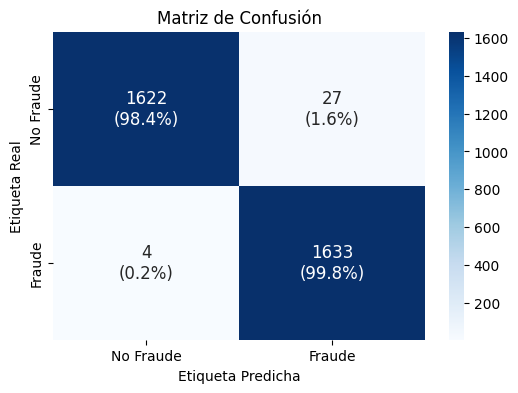

In [188]:
plot_confusion_matrix(y_test, y_pred_gb)

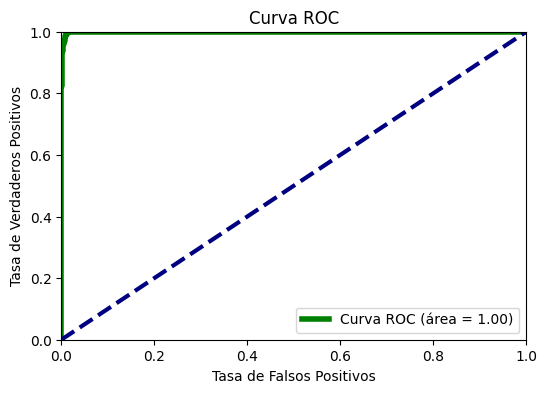

In [191]:
plot_roc_curve(y_test,y_scores_gb)

In [161]:
print_classification_report(y_test, y_pred_gb)

|              |  precision  |  recall  |  f1-score  |  support  |
|--------------|-------------|----------|------------|-----------|
|      0       |   0.99754   | 0.983626 |  0.990534  |   1649    |
|      1       |  0.983735   | 0.997557 |  0.990598  |   1637    |
|   accuracy   |  0.990566   | 0.990566 |  0.990566  | 0.990566  |
|  macro avg   |  0.990637   | 0.990591 |  0.990566  |   3286    |
| weighted avg |  0.990663   | 0.990566 |  0.990566  |   3286    |
